<a href="https://colab.research.google.com/github/Akul-Patel/DataMining/blob/main/CNN_RNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN-RNN Assignment


## Fashion MNIST Classification with RNNs
Explain how you can classify the fashion MNIST dataset using LSTM RNNs. You need to draw the LSTM RNN architecture (pref unrolled) and comment on all dimensions that you decide.

**Answer:**
Normally, the Convolutional Neural Network (CNN) is the primary option for image classification since it initially learns to detect picture components before moving on to bigger structures, which is ideal for image classification. RNN, in contrast to CNN, learns to detect picture characteristics over time. 

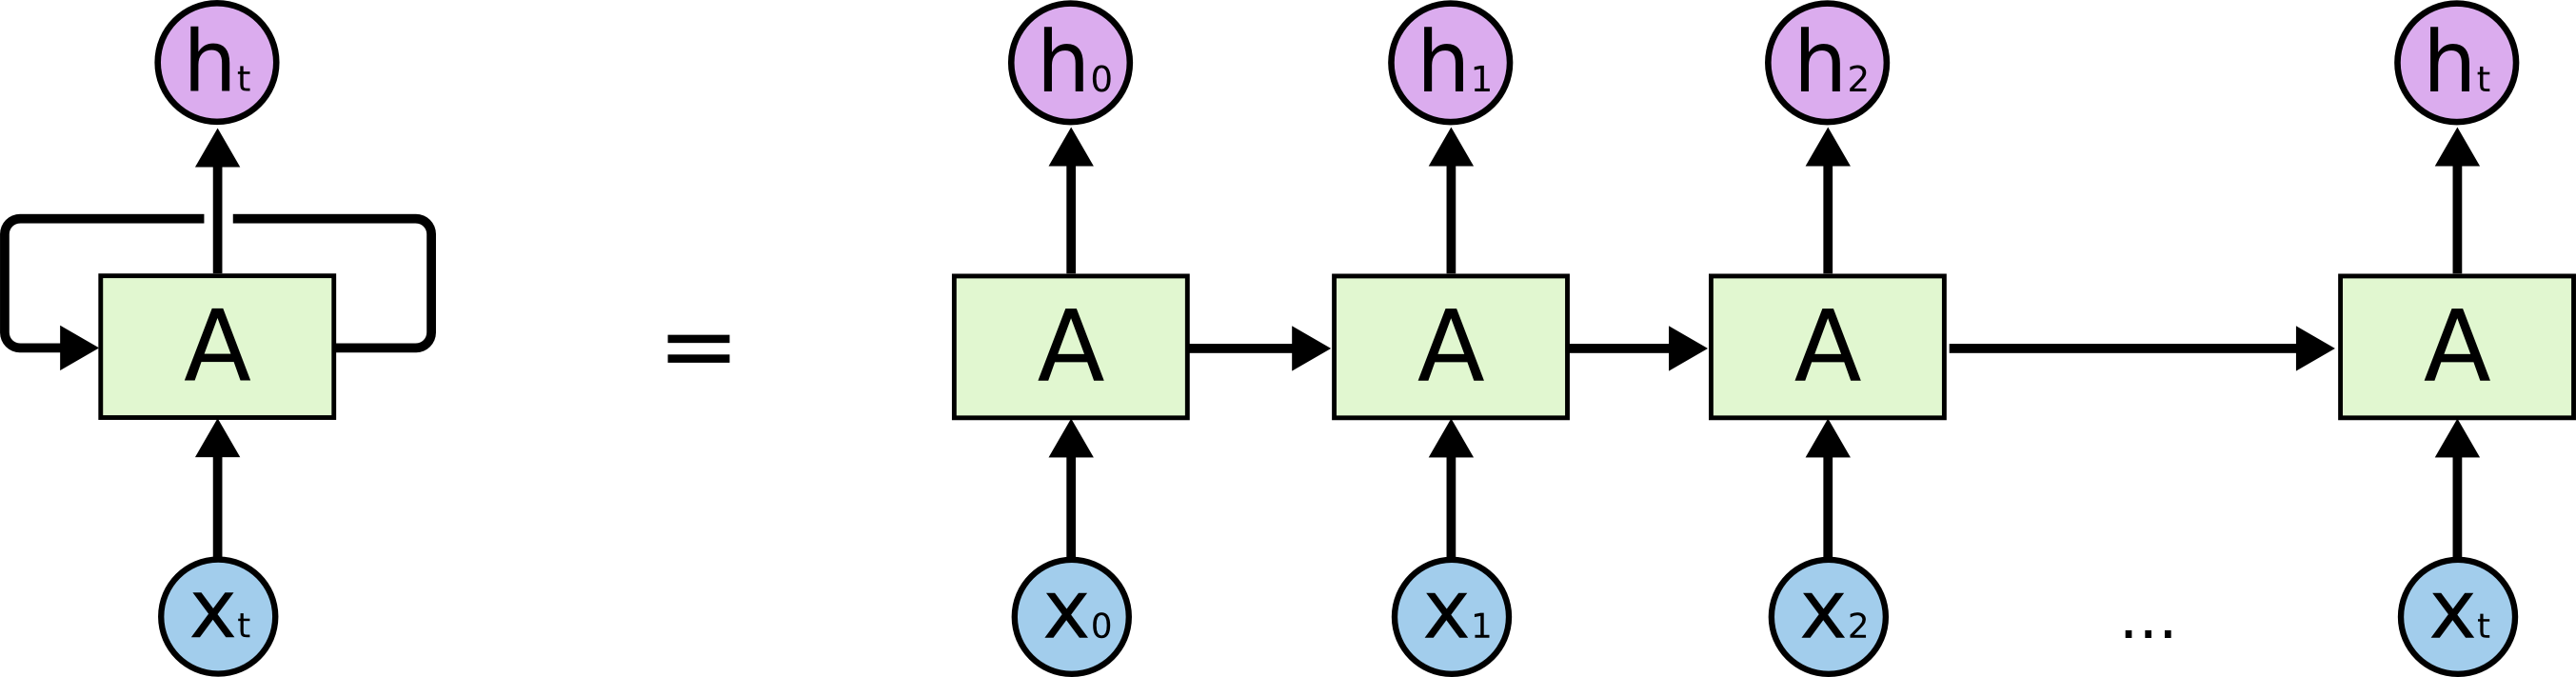

Traditional RNN, can be unreliable in reality, especially when backpropagating gradients across lengthy time frames, resulting in gradient explosion or disappearing. As a result, I try to enhance the model using the LSTM approach. It can solve this problem by substituting memory cells for the hidden units. These memory cells may hold information until it is needed, allowing the model to avoid exploiting long-range data dependencies. The construction of an LSTM memory cell is shown in Figure 2. (Graves, 2013). Input, output, and forget gates govern the flow of data into and out of the memory cell.


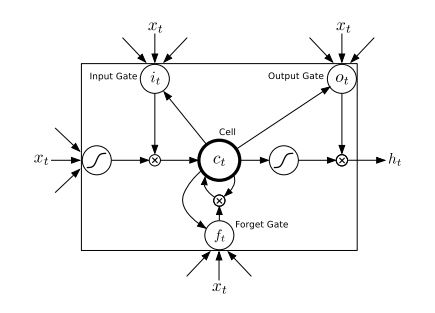

The LSTM architecture, which stores information in purpose-built memory cells, is better at detecting and exploiting long-range relationships in data.
$A$ single LSTM memory cell is shown in Figure 2. A is implemented by the following composite function in the version of LSTM used in this project:


$i_t = σ (W_{xi}x_t + W_{hi}h_{t−1} + W_{ci}c_{t−1} + b_i)$ (1)

$f_t = σ (W_{xf}x_t + W_{hf}h_{t−1} + W_{cf}c_{t−1} + b_f )$ (2)

$c_t = f_tc_{t−1} + i_t tanh (W_{xc}x_t + W_{hc}h_{t−1} + b_c)$ (3)

$o_t = σ (W_{xo}x_t + W_{ho}h_{t−1} + W_{co}c_t + b_o)$ (4)

$h_t = o_t tanh(c_t)$ (5)


Where σ is the logistic sigmoid function, and $i, f, o$ and $c$ are respectively the input gate, forget gate, output gate, cell and cell input activation vectors, all of which are the same size as the hidden vector $h$. The weight matrix subscripts have the obvious meaning, for example $W_{hi}$  is the hidden-input gate matrix, $W_{xo}$ is the input-output gate matrix etc. The weight matrices from the cell to gate vectors (e.g. $W_{ci}$) are diagonal, so element $m$ in each gate vector only receives input from element $m$ of the cell vector. 

## CNN Implementation
Implement the RNN approach you outlined in the previous question using TF or PyTortch. Implement the equivalent CNN using the same framework (CNN solution is in your notes so just include this solution).

2.7.0


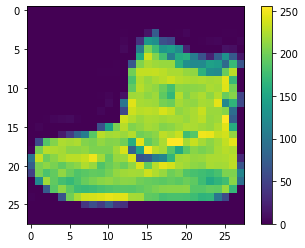

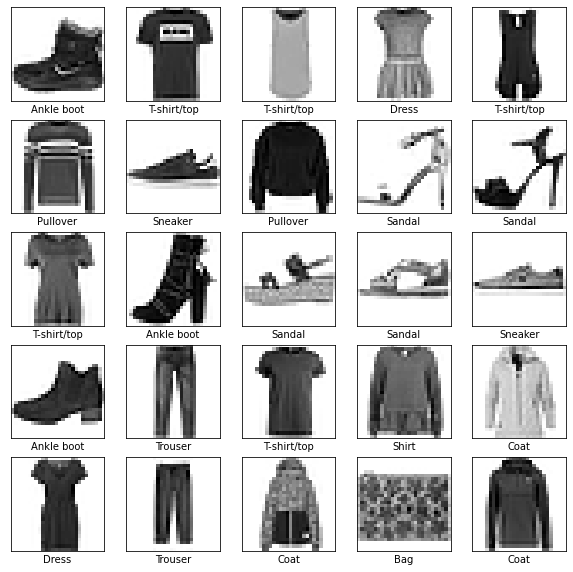

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4957 - accuracy: 0.8257
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3709 - accuracy: 0.8658
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3357 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3111 - accuracy: 0.8857
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2944 - accuracy: 0.8908
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2780 - accuracy: 0.8968
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2669 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2556 - accuracy: 0.9048
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2467 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.234

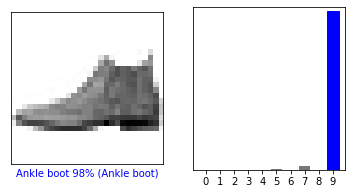

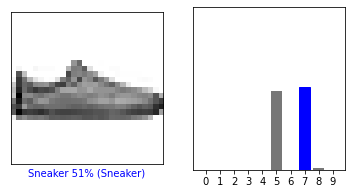

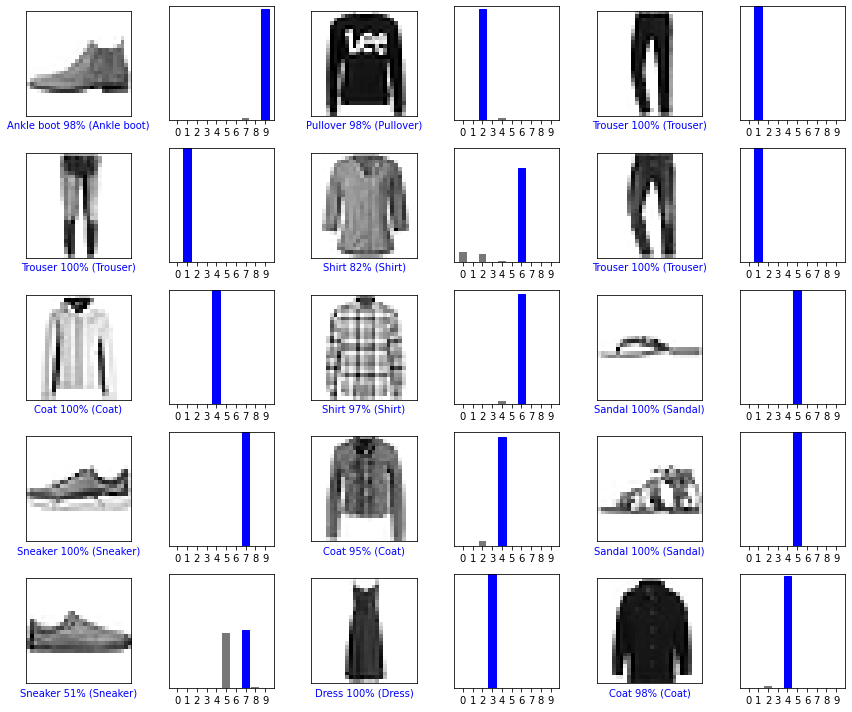

(28, 28)
(1, 28, 28)
[[1.4252623e-07 1.1051826e-06 1.9801326e-05 4.6052460e-09 1.3012841e-07
  4.8194876e-01 6.7119639e-09 5.0736135e-01 1.0668676e-02 1.6692884e-08]]


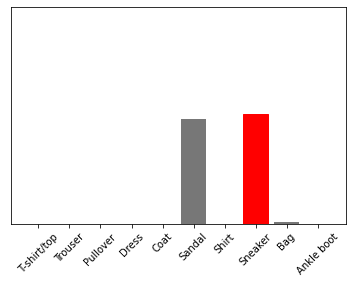


Test accuracy: 0.8715000152587891


In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_labels)

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

train_images = train_images / 255.0

test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Define CNN model 
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
cnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

cnn_model.fit(train_images, train_labels, epochs=10)
test_loss, test_acc = cnn_model.evaluate(test_images,  test_labels, verbose=2)

cnn_model_test_loss = test_loss
cnn_model_test_acc = test_acc
print('\nTest accuracy:', test_acc)

probability_model = tf.keras.Sequential([cnn_model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

predictions[0]
np.argmax(predictions[0])
test_labels[0]
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Grab an image from the test dataset.
img = test_images[12]

print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = probability_model.predict(img)

print(predictions_single)
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

np.argmax(predictions_single[0])


print('\nTest accuracy:', test_acc)

## LSTM RNN Implementation

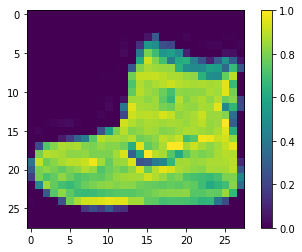

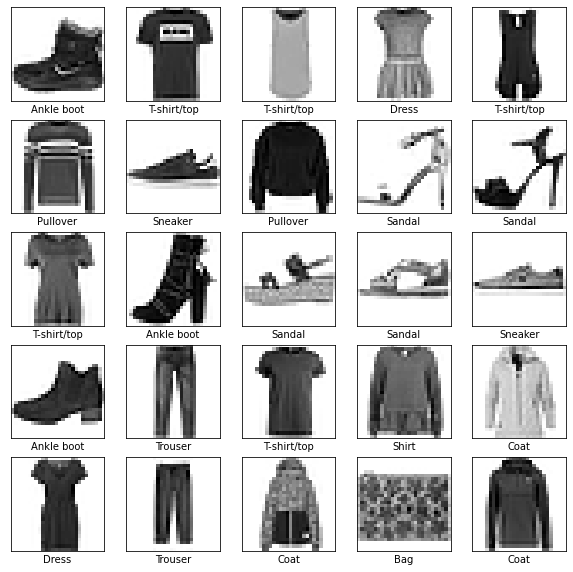

Epoch 1/10
1875/1875 [==============================] - 29s 14ms/step - loss: 0.5671 - accuracy: 0.7944
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.4128 - accuracy: 0.8511
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3714 - accuracy: 0.8639
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3497 - accuracy: 0.8715
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3326 - accuracy: 0.8795
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3177 - accuracy: 0.8834
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3042 - accuracy: 0.8896
Epoch 8/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2944 - accuracy: 0.8920
Epoch 9/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2858 - accuracy: 0.8950
Epoch 10/10
1875/1875 [==============================] - 28s 15m

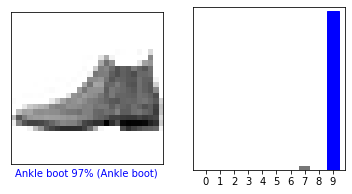

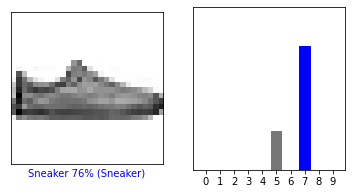

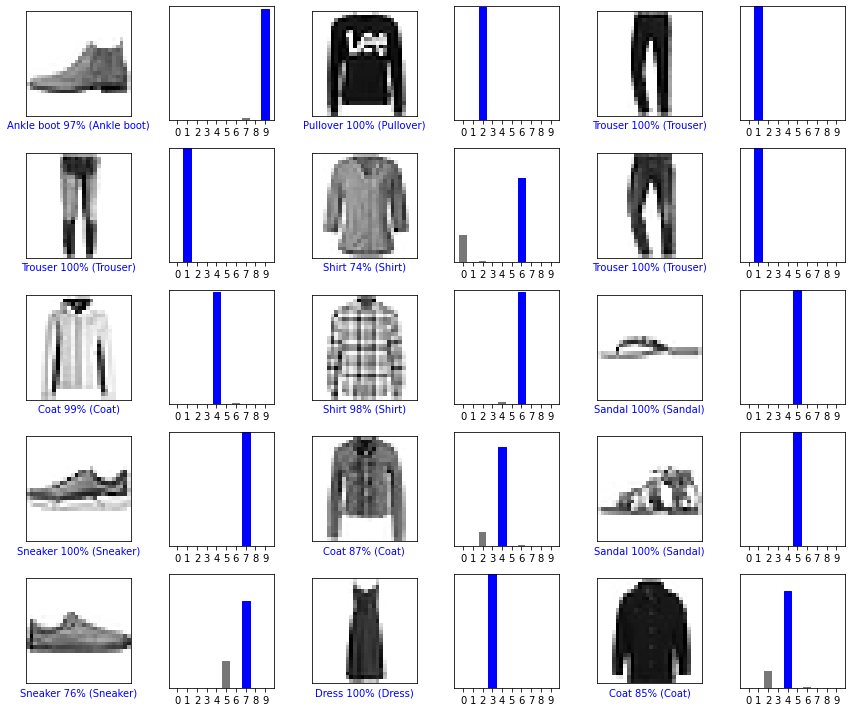

(28, 28)
(1, 28, 28)
[[3.9000657e-05 3.2516435e-04 7.0996386e-05 2.1278928e-04 5.4626140e-05
  2.3890708e-01 2.1324971e-05 7.5792521e-01 6.1073707e-04 1.8331236e-03]]


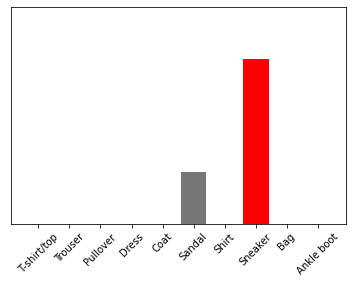


Test accuracy: 0.8855999708175659


In [ ]:
# # TensorFlow and tf.keras
# import tensorflow as tf

# # Helper libraries
# import numpy as np
# import matplotlib.pyplot as plt
# from tensorflow import keras
# from tensorflow.keras import layers

# print(tf.__version__)

# fashion_mnist = tf.keras.datasets.fashion_mnist

# (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
#                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# train_images.shape
# len(train_labels)
# train_labels
# test_images.shape
# len(test_labels)


# train_images = train_images / 255.0
# test_images = test_images / 255.0


plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()



plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Define RNN LSTM model 

batch_size = 64
# Each MNIST image batch is a tensor of shape (batch_size, 28, 28).
# Each input sequence will be of size (28, 28) (height is treated like time).
input_dim = 28

units = 64
output_size = 10  # labels are from 0 to 9
def build_model(allow_cudnn_kernel=True):
    # CuDNN is only available at the layer level, and not at the cell level.
    # This means `LSTM(units)` will use the CuDNN kernel,
    # while RNN(LSTMCell(units)) will run on non-CuDNN kernel.
    if allow_cudnn_kernel:
        # The LSTM layer with default options uses CuDNN.
        lstm_layer = keras.layers.LSTM(units, input_shape=(None, input_dim))
    else:
        # Wrapping a LSTMCell in a RNN layer will not use CuDNN.
        lstm_layer = keras.layers.RNN(
            keras.layers.LSTMCell(units), input_shape=(None, input_dim)
        )
    model = keras.models.Sequential(
        [
            lstm_layer,
            keras.layers.BatchNormalization(),
            keras.layers.Dense(output_size),
        ]
    )
    return model

model = build_model(allow_cudnn_kernel=True)

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
LSTM_RNNs_model_test_loss = test_loss
LSTM_RNNs_model_test_acc = test_acc
print('\nTest accuracy:', test_acc)


probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

predictions[0]
np.argmax(predictions[0])
test_labels[0]
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Grab an image from the test dataset.
img = test_images[12]

print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = probability_model.predict(img)

print(predictions_single)
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

np.argmax(predictions_single[0])


print('\nTest accuracy:', test_acc)

## Performance Comparison
Compare the performance of the LSTM RNN network vs CNN. Compare the training times between RNN and CNN that achieves the same test performance.

**Answer:** I put the CNN model provided in the notes to the test, as well as the LSTM RNN model. The results demonstrate that the LSTM model performs better the CNN model, with a higher accuracy of 89.27 percent compared to 87.79 percent for the CNN model. However, the LSTM model takes substantially longer time in the training phase (epoch) than the CNN model. In addition, the CNN model incorrectly identifies the sneaker as a sandal, but the LSTM model correctly predicts the sneaker as a sneaker.

In [ ]:
print("Performance Comparison: CNN vs LSTM RNNs")
print("CNN Model loss:", cnn_model_test_loss)
print("CNN Model Accuracy:", cnn_model_test_acc)
print("LSTM RNNs Model loss:", LSTM_RNNs_model_test_loss)
print("LSTM RNNs Model Accuracy:", LSTM_RNNs_model_test_acc)

Performance Comparison: CNN vs LSTM RNNs
CNN Model loss: 0.3750356137752533
CNN Model Accuracy: 0.8715000152587891
LSTM RNNs Model loss: 0.3154289424419403
LSTM RNNs Model Accuracy: 0.8855999708175659


## CNN + RNN
Read [this](https://openaccess.thecvf.com/content_cvpr_2016/papers/Wang_CNN-RNN_A_Unified_CVPR_2016_paper.pdf) paper and write a summary on how RNN and CNNs can be combined for the classification task and why you believe we get a performance benefit from such combination.

**Answer:** CNNs are ideal for single-label image classification, but in most real-world scenarios, image will have several labels. There have been a few methods for it to support on CNN, such as developing a separate classifier for each label, but it may be complicated and difficult for others to interpret. The proposed approach in the study "CNN-RNN: A Unified Framework for Multi-label Image Classification" used both CNN and RNN models to combine the benefits of joint image embedding and label co-occurrence models. The study provides a few samples by using the combined CNN and RNN model to certain well-known datasets and achieving better results than the traditional method. I feel that combining the RNN and CNN models for this project will improve the performance of the model as proposed in the paper.

## Refrences
1. Graves, A. Generating sequences with recurrent neural networks - arxiv. Retrieved November 28, 2021, from https://arxiv.org/pdf/1308.0850. 

2. Monogioudis, P. Fashion mnist case study. Fashion MNIST Case Study | Data Mining. Retrieved November 28, 2021, from https://pantelis.github.io/cs634/docs/common/lectures/dnn/fashion-mnist-case-study/. 

3. Olah, C. Understanding LSTM networks. Retrieved November 28, 2021, from https://colah.github.io/posts/2015-08-Understanding-LSTMs/.  